In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* request_id	Код события

* priority	Приоритет события

* status	Статус события

* hwregion	Описание элемента

* neaddress	Адрес элемента

* classificatorcause	Классификатор событий

* shortdescription	Описание события

* nename	Имя элемента

* ne_priority	Приоритет элемента

* eventtime_dt_utc	Дата и время начала события

* fixtime_dt_utc	Дата и время окончания события

* nesite	Имя элемента 0

* site_priority	Приоритет элемента 0

In [5]:
df=pd.read_excel('events_for Data analytics tasks.xlsx',sheet_name='Dataset')


In [6]:
df.head()

,request_id,priority,status,hwregion,neaddress,classificatorcause,shortdescription,nename,ne_priority,eventtime_dt_utc,fixtime_dt_utc,nesite,site_priority
0,MSK000028046528,5,9,СЗ\Вологда,"Россия, обл. Вологодская, г. Вологда, ул. Рубц...",/Нарушение температурного режима на объекте/Не...,Превышение допустимого значения температуры.,BTS_35_0047_GULN,4.0,2024-04-10 11:12:11,2024-04-10 18:50:05,PL_35_0047,5.0
1,MSK000028197163,5,2,П\Самара,"Россия, обл. Самарская, г. Самара, пр-т Кирова...",NaN,Превышение допустимого значения температуры.,BTS_63_788_U,3.0,2024-04-26 05:50:06,NaT,PL_63_788,4.0
2,MSK000028200727,5,9,С\Новосибирск,"Россия, обл. Новосибирская, р-н Куйбышевский, ...",/SW/Сбой ПО оборудования,Занижение допустимого значения температуры. #м...,BTS_54_1011_U,3.0,2024-04-26 09:38:41,2024-06-07 06:48:19,PL_54_1011,4.0
3,MSK000028046339,5,9,М\Москва,"Россия, обл. Московская, г. Видное, п Битца, м...",/Нарушение температурного режима на объекте/Не...,Превышение допустимого значения температуры.,BTS_77_22816_LN18L26,4.0,2024-04-10 10:45:39,2024-04-10 11:24:50,PL_77_22816,5.0
4,MSK000028211391,5,9,П\Казань,"Россия, респ. Татарстан, г. Набережные Челны, ...",/Причина не установлена/Самовосстановление (пр...,Неисправность климатической системы.,BTS_16_01903_LTN,4.0,2024-04-27 11:09:15,2024-04-27 19:01:19,PL_16_01903,5.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693332 entries, 0 to 693331
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   request_id          693332 non-null  object        
 1   priority            693332 non-null  int64         
 2   status              693332 non-null  int64         
 3   hwregion            693332 non-null  object        
 4   neaddress           686117 non-null  object        
 5   classificatorcause  590862 non-null  object        
 6   shortdescription    693332 non-null  object        
 7   nename              686211 non-null  object        
 8   ne_priority         693228 non-null  float64       
 9   eventtime_dt_utc    693332 non-null  datetime64[ns]
 10  fixtime_dt_utc      546144 non-null  datetime64[ns]
 11  nesite              681697 non-null  object        
 12  site_priority       679829 non-null  float64       
dtypes: datetime64[ns](2), float64

In [8]:
df.isnull().sum()

request_id                 0
priority                   0
status                     0
hwregion                   0
neaddress               7215
classificatorcause    102470
shortdescription           0
nename                  7121
ne_priority              104
eventtime_dt_utc           0
fixtime_dt_utc        147188
nesite                 11635
site_priority          13503
dtype: int64

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
693327     True
693328     True
693329    False
693330    False
693331     True
Length: 693332, dtype: bool

In [10]:
df = df.drop_duplicates()
df.shape

(606821, 13)

In [11]:
df['classificatorcause'].unique()

array(['/Нарушение температурного режима на объекте/Неисправность кондиционера',
       nan, '/SW/Сбой ПО оборудования',
       '/Причина не установлена/Самовосстановление (причина не выявлена)',
       '/Некорректные действия/Факт наличия МИ не подтверждён',
       '/Неисправности HW/HW/Выход из строя\\Сбой платы\\блока',
       '/Внешний фактор/Административные причины/Отключение по требованию компетентных\\регулирующих органов',
       '/Погодные условия/Очень сильный ветер (в том числе шквал)',
       '/Неисправности HW/HW/Неисправность АФУ',
       '/Транспорт/HW/Неисправность соединительного кабеля',
       '/Внешний фактор/Другие операторы', '/Неисправности HW/HW',
       '/Внешний фактор/Нештатная аварийная ситуация при проведении работ',
       '/Транспорт/ВОЛС/Обрыв\\Повреждение ВОК',
       '/Причина не установлена/Не сдано в регион в связи с кратковременностью аварии',
       '/Внешний фактор/Срабатывание ОПС/Сбой в работе блока ОПС',
       '/Электропитание/Пропадание внеш

# 1

рачитаю длительность события, удалю строки с пропусками в адресах.



In [12]:
# Расчёт длительности в часах
df['duration'] = (df['fixtime_dt_utc'] - df['eventtime_dt_utc']).dt.total_seconds() / 3600

почищу аномально долгие события

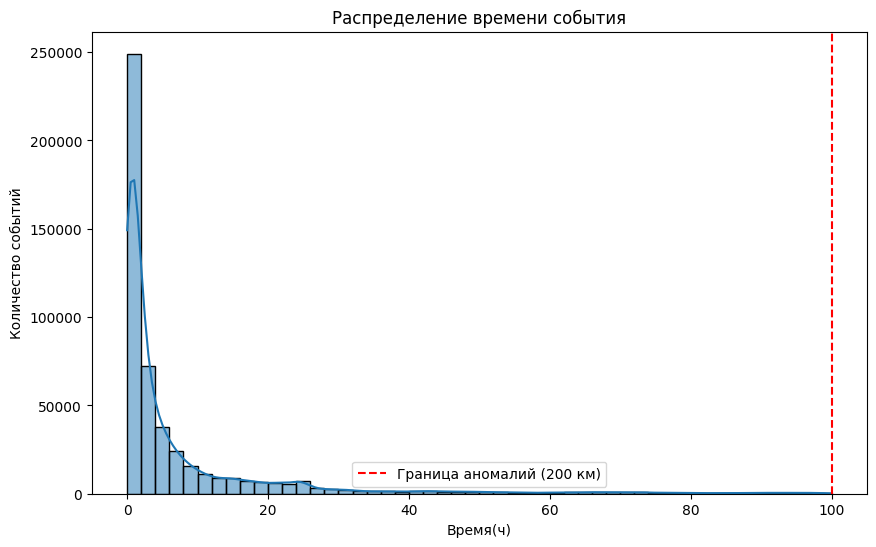

In [13]:
df = df[df['duration'] <= 100]


plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=50, kde=True)
plt.axvline(x=100, color='r', linestyle='--', label='Граница аномалий (200 км)')
plt.title('Распределение времени события')
plt.xlabel('Время(ч)')
plt.ylabel('Количество событий')
plt.legend()
plt.show()


In [14]:
df_1=df.dropna(subset=['eventtime_dt_utc', 'fixtime_dt_utc','neaddress'])

In [15]:
df_1


,request_id,priority,status,hwregion,neaddress,classificatorcause,shortdescription,nename,ne_priority,eventtime_dt_utc,fixtime_dt_utc,nesite,site_priority,duration
0,MSK000028046528,5,9,СЗ\Вологда,"Россия, обл. Вологодская, г. Вологда, ул. Рубц...",/Нарушение температурного режима на объекте/Не...,Превышение допустимого значения температуры.,BTS_35_0047_GULN,4.0,2024-04-10 11:12:11,2024-04-10 18:50:05,PL_35_0047,5.0,7.631667
3,MSK000028046339,5,9,М\Москва,"Россия, обл. Московская, г. Видное, п Битца, м...",/Нарушение температурного режима на объекте/Не...,Превышение допустимого значения температуры.,BTS_77_22816_LN18L26,4.0,2024-04-10 10:45:39,2024-04-10 11:24:50,PL_77_22816,5.0,0.653056
4,MSK000028211391,5,9,П\Казань,"Россия, респ. Татарстан, г. Набережные Челны, ...",/Причина не установлена/Самовосстановление (пр...,Неисправность климатической системы.,BTS_16_01903_LTN,4.0,2024-04-27 11:09:15,2024-04-27 19:01:19,PL_16_01903,5.0,7.867778
5,MSK000028110590,5,9,ДВ\Владивосток,"Россия, край Приморский, г. Владивосток, ул. Б...",/Нарушение температурного режима на объекте/Не...,Срабатывание датчика температуры АКБ.,BTS_25_280_U,4.0,2024-04-17 09:43:13,2024-04-17 14:09:22,PL_25_280,1.0,4.435833
6,MSK000028046568,5,9,М\Москва,"Россия, обл. Московская, г. Королёв, ул. Проле...",/Нарушение температурного режима на объекте/Не...,Срабатывание датчика температуры ШКВ.,BTS_77_6187_GDU9LN18L21,4.0,2024-04-10 10:50:12,2024-04-10 11:46:58,PL_77_6187,5.0,0.946111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693322,MSK000028224986,5,9,С\Барнаул,"Россия, край Алтайский, р-н Шелаболихинский, с...",/Электропитание/Пропадание внешнего электропит...,Срабатывание охранной сигнализации.,BTS_22_0072_U,4.0,2024-04-29 07:54:36,2024-04-29 09:32:19,PL_22_0072,5.0,1.628611
693325,MSK000028226749,5,9,С\Барнаул,"Россия, край Алтайский, г. Барнаул, с Власиха,...",/SW/Сбой ПО оборудования,Срабатывание охранной сигнализации.,BTS_22_0990_U,4.0,2024-04-29 13:29:41,2024-04-30 00:53:19,PL_22_0990,4.0,11.393889
693326,MSK000028152126,3,9,У\Екатеринбург,"Россия, обл. Свердловская, г. Екатеринбург, ул...",/Активное оборудование/Неисправность HW/Неиспр...,"Деградация услуги КТВ/ЦТВ\nРоссия, обл Свердло...",OP_66КР_01071_2,3.0,2024-04-22 05:30:37,2024-04-22 10:58:00,PL_66_51242,4.0,5.456389
693329,MSK000028217383,4,9,М\Москва,"Россия, г. Москва, пр-д 2-й Вязовский, д. 6/ст...",/SW/Сбой ПО оборудования,"Неисправность POD prs-5f7vc, NODE=tas08msk-p...",NTAS08MSK,0.0,2024-04-28 06:04:33,2024-05-01 16:17:29,PL_77_4248,0.0,82.215556


In [16]:
df_1['hwregion'].unique()

array(['СЗ\\Вологда', 'М\\Москва', 'П\\Казань', 'ДВ\\Владивосток',
       'ЮГ\\Ростов-на-Дону', 'У\\Екатеринбург', 'П\\Самара', 'Ц\\Тамбов',
       'ЮГ\\Ставрополь', 'ЮГ\\Краснодар', 'С\\Барнаул', 'ЮГ\\Волгоград',
       'Ц\\Тула', 'Ц\\Владимир', 'ДВ\\Благовещенск', 'П\\НижнийНовгород',
       'С\\Томск', 'П\\Пенза', 'Ц\\Калуга', 'С\\Омск', 'ДВ\\Чита',
       'ЮГ\\Махачкала', 'Ц\\Ярославль', 'Ц\\Тверь', 'Ц\\Иваново',
       'П\\Саратов', 'П\\Чебоксары', 'П\\Уфа', 'ЮГ\\Владикавказ',
       'Ц\\Брянск', 'ЮГ\\Сочи', 'ДВ\\Якутск', 'ДВ\\Магадан', 'С\\Абакан',
       'Ц\\Воронеж', 'С\\Новосибирск', 'У\\Челябинск', 'СЗ\\Новгород',
       'Ц\\Липецк', 'У\\Пермь', 'СЗ\\СПБ', 'Ц\\Курск', 'С\\Красноярск',
       'С\\Горно-Алтайск', 'ЮГ\\Черкесск', 'ДВ\\Хабаровск',
       'ДВ\\Южно-Сахалинск', 'У\\Тюмень', 'С\\Кызыл', 'П\\Киров',
       'ЮГ\\Новороссийск', 'ЮГ\\Астрахань', 'ЮГ\\Майкоп', 'П\\Оренбург',
       'ДВ\\Биробиджан', 'У\\ХМАО', 'ДВ\\Иркутск', 'П\\Ижевск',
       'П\\Йошкар-Ола', 'СЗ\\Мурм

Выбор 5 городов с близкой плотностью
Города с плотностью 2500–3500 чел./км² (сопоставимые между собой):

ЮГ\Ростов-на-Дону (~3200)

П\Казань (~2900)

У\Екатеринбург (~2800)

С\Новосибирск (~2700)

ЮГ\Краснодар (~2500)

In [17]:
selected_cities = [
    'ЮГ\\Ростов-на-Дону',
    'П\\Казань',
    'У\\Екатеринбург',
    'С\\Новосибирск',
    'ЮГ\\Краснодар'
]
df_1= df_1[df_1['hwregion'].isin(selected_cities)]
address=df_1['neaddress'].values
df_1

,request_id,priority,status,hwregion,neaddress,classificatorcause,shortdescription,nename,ne_priority,eventtime_dt_utc,fixtime_dt_utc,nesite,site_priority,duration
4,MSK000028211391,5,9,П\Казань,"Россия, респ. Татарстан, г. Набережные Челны, ...",/Причина не установлена/Самовосстановление (пр...,Неисправность климатической системы.,BTS_16_01903_LTN,4.0,2024-04-27 11:09:15,2024-04-27 19:01:19,PL_16_01903,5.0,7.867778
10,MSK000028121544,5,9,ЮГ\Ростов-на-Дону,"Россия, обл. Ростовская, г. Ростов-на-Дону, пр...",/Нарушение температурного режима на объекте/Не...,Неисправность модуля управления кондиционеров....,BTS_61_0166_G,4.0,2024-04-18 08:55:59,2024-04-18 09:52:25,PL_61_0166,3.0,0.940556
11,MSK000028211824,3,9,У\Екатеринбург,"Россия, обл. Свердловская, г. Екатеринбург, п ...",/Причина не установлена/Самовосстановление (пр...,Неисправность кондиционера,BTS_66_341_U,3.0,2024-04-28 09:26:42,2024-04-28 12:50:39,PL_66_341,1.0,3.399167
36,MSK000028017342,0,9,ЮГ\Краснодар,"Россия, край Краснодарский, г. Краснодар, ул. ...",/SW/Сбой ПО оборудования,КП. Неисправность кондиционера №3 в автозале: ...,ESC_23_9998_2,0.0,2024-04-07 09:43:43,2024-04-07 10:09:59,PL_23_9998,1.0,0.437778
99,MSK000028122538,5,9,ЮГ\Краснодар,"Россия, край Краснодарский, р-н Новокубанский,...",/Нарушение температурного режима на объекте/Не...,Критическое превышение допустимого значения те...,BTS_23_05222_L18L26N,4.0,2024-04-18 11:35:16,2024-04-18 18:15:57,PL_23_05222,5.0,6.678056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693306,MSK000028227503,4,9,П\Казань,"Россия, респ. Татарстан, р-н Альметьевский, г....",/Электропитание/Пропадание внешнего электропит...,#многократно\nОтключение штатного электропитания.,BTS_16_01522_U,4.0,2024-04-29 16:47:25,2024-05-01 05:50:50,PL_16_01522,5.0,37.056944
693315,MSK000028225451,3,9,С\Новосибирск,"Россия, обл. Новосибирская, р-н Новосибирский,...",/Транспорт/HW/Неисправность соединительного ка...,Отключение всех секторов на данной NodeB ( 9 )...,BTS_54_0458_U,3.0,2024-04-29 09:17:15,2024-05-01 06:31:07,PL_54_0458,3.0,45.231111
693318,MSK000028225557,5,9,С\Новосибирск,"Россия, обл. Новосибирская, г. Новосибирск, пр...",/Причина не установлена/Самовосстановление (пр...,Занижение допустимого значения температуры.,BTS_54_1077_ULTN,4.0,2024-04-29 09:40:42,2024-05-01 06:20:03,PL_54_1077,4.0,44.655833
693326,MSK000028152126,3,9,У\Екатеринбург,"Россия, обл. Свердловская, г. Екатеринбург, ул...",/Активное оборудование/Неисправность HW/Неиспр...,"Деградация услуги КТВ/ЦТВ\nРоссия, обл Свердло...",OP_66КР_01071_2,3.0,2024-04-22 05:30:37,2024-04-22 10:58:00,PL_66_51242,4.0,5.456389


Делаю парсинг координат центров регионов с помощью OSM

In [18]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geo_app")
coordinates_city= {}
for city in selected_cities:
    location = geolocator.geocode(city)
    if location:
        coordinates_city[city] = (location.latitude, location.longitude)



In [19]:
coordinates_city
df_1['cords_city'] = df_1['hwregion'].map(coordinates_city)
df_1

C:\Users\user\AppData\Local\Temp\ipykernel_324\3034545078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['cords_city'] = df_1['hwregion'].map(coordinates_city)


,request_id,priority,status,hwregion,neaddress,classificatorcause,shortdescription,nename,ne_priority,eventtime_dt_utc,fixtime_dt_utc,nesite,site_priority,duration,cords_city
4,MSK000028211391,5,9,П\Казань,"Россия, респ. Татарстан, г. Набережные Челны, ...",/Причина не установлена/Самовосстановление (пр...,Неисправность климатической системы.,BTS_16_01903_LTN,4.0,2024-04-27 11:09:15,2024-04-27 19:01:19,PL_16_01903,5.0,7.867778,"(55.8645932, 49.1269224)"
10,MSK000028121544,5,9,ЮГ\Ростов-на-Дону,"Россия, обл. Ростовская, г. Ростов-на-Дону, пр...",/Нарушение температурного режима на объекте/Не...,Неисправность модуля управления кондиционеров....,BTS_61_0166_G,4.0,2024-04-18 08:55:59,2024-04-18 09:52:25,PL_61_0166,3.0,0.940556,"(47.1764662, 39.6178396)"
11,MSK000028211824,3,9,У\Екатеринбург,"Россия, обл. Свердловская, г. Екатеринбург, п ...",/Причина не установлена/Самовосстановление (пр...,Неисправность кондиционера,BTS_66_341_U,3.0,2024-04-28 09:26:42,2024-04-28 12:50:39,PL_66_341,1.0,3.399167,"(56.839104, 60.60825)"
36,MSK000028017342,0,9,ЮГ\Краснодар,"Россия, край Краснодарский, г. Краснодар, ул. ...",/SW/Сбой ПО оборудования,КП. Неисправность кондиционера №3 в автозале: ...,ESC_23_9998_2,0.0,2024-04-07 09:43:43,2024-04-07 10:09:59,PL_23_9998,1.0,0.437778,"(45.0981195, 38.9769024)"
99,MSK000028122538,5,9,ЮГ\Краснодар,"Россия, край Краснодарский, р-н Новокубанский,...",/Нарушение температурного режима на объекте/Не...,Критическое превышение допустимого значения те...,BTS_23_05222_L18L26N,4.0,2024-04-18 11:35:16,2024-04-18 18:15:57,PL_23_05222,5.0,6.678056,"(45.0981195, 38.9769024)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693306,MSK000028227503,4,9,П\Казань,"Россия, респ. Татарстан, р-н Альметьевский, г....",/Электропитание/Пропадание внешнего электропит...,#многократно\nОтключение штатного электропитания.,BTS_16_01522_U,4.0,2024-04-29 16:47:25,2024-05-01 05:50:50,PL_16_01522,5.0,37.056944,"(55.8645932, 49.1269224)"
693315,MSK000028225451,3,9,С\Новосибирск,"Россия, обл. Новосибирская, р-н Новосибирский,...",/Транспорт/HW/Неисправность соединительного ка...,Отключение всех секторов на данной NodeB ( 9 )...,BTS_54_0458_U,3.0,2024-04-29 09:17:15,2024-05-01 06:31:07,PL_54_0458,3.0,45.231111,"(55.0045913, 82.9519599)"
693318,MSK000028225557,5,9,С\Новосибирск,"Россия, обл. Новосибирская, г. Новосибирск, пр...",/Причина не установлена/Самовосстановление (пр...,Занижение допустимого значения температуры.,BTS_54_1077_ULTN,4.0,2024-04-29 09:40:42,2024-05-01 06:20:03,PL_54_1077,4.0,44.655833,"(55.0045913, 82.9519599)"
693326,MSK000028152126,3,9,У\Екатеринбург,"Россия, обл. Свердловская, г. Екатеринбург, ул...",/Активное оборудование/Неисправность HW/Неиспр...,"Деградация услуги КТВ/ЦТВ\nРоссия, обл Свердло...",OP_66КР_01071_2,3.0,2024-04-22 05:30:37,2024-04-22 10:58:00,PL_66_51242,4.0,5.456389,"(56.839104, 60.60825)"


Выявляю уникальные адреса среди выбранных городов, чтобы в дальнейшем уменьшить кол-во данных для парсинга координат адресов


In [20]:
adrs=df_1['neaddress'].value_counts()
adrs_df = adrs.reset_index()
 
adrs_df.columns = ['neaddress', 'count']

In [21]:
adrs_df



,neaddress,count
0,"Россия, край Краснодарский, г. Краснодар, ул. ...",2003
1,"Россия, обл. Свердловская, г. Екатеринбург, ул...",1777
2,"Россия, край Краснодарский, г. Краснодар, ул. ...",1620
3,"Россия, обл. Свердловская, г. Екатеринбург, пе...",1512
4,"Россия, обл. Новосибирская, г. Новосибирск, ул...",1392
...,...,...
11763,"Россия, обл. Свердловская, г. Екатеринбург, ул...",1
11764,"Россия, обл. Свердловская, г. Екатеринбург, ул...",1
11765,"Россия, обл. Свердловская, р-н Сысертский, д Т...",1
11766,"Россия, обл. Свердловская, г. Екатеринбург, п ...",1


Нормализую адрес под единую форму записи( город - улица )

In [22]:
import re
def normalize_address(address):
    # Удаление лишних пробелов
    address = re.sub(r'\s+', ' ', address.strip())

    # Извлечение города и улицы. Предполагаем, что город всегда идет после "г." или "г" и улица после "ул." или "ул" роддерживаем различные типы населенных пунктов: г., с., п., ст., пер. и т.д.
    place_match = re.search(r'(г\.|с\.|п\.|ст-ца|ст\.|р-н)\s*([^,]+)', address)
    street_match = re.search(r'(ул\.|пер\.|ш\.|пр\.)\s*([^,]+)', address)

    if place_match and street_match:
        place_type = place_match.group(1).strip()  # Тип населенного пункта
        place_name = place_match.group(2).strip()  # Название населенного пункта
        street = street_match.group(0).strip() + ' ' + street_match.group(2).strip()  # "ул. Название улицы"
        return f"{street}, {place_type} {place_name}"

    # Дополнительная обработка для случаев с районами
    district_match = re.search(r'р-н\s*([^,]+)', address)
    if district_match and street_match:
        district_name = district_match.group(1).strip()  # Название района
        street = street_match.group(0).strip() + ' ' + street_match.group(2).strip()  # "ул. Название улицы"
        return f"{street}, р-н {district_name}"

address_mapping = {addr: normalize_address(addr) for addr in adrs_df['neaddress']}


adrs_df['normalized_address'] = adrs_df['neaddress'].map(address_mapping)
adrs_df.dropna()



,neaddress,count,normalized_address
0,"Россия, край Краснодарский, г. Краснодар, ул. ...",2003,"ул. Морская Морская, г. Краснодар"
1,"Россия, обл. Свердловская, г. Екатеринбург, ул...",1777,"ул. Зоологическая Зоологическая, г. Екатеринбург"
2,"Россия, край Краснодарский, г. Краснодар, ул. ...",1620,"ул. Морская Морская, г. Краснодар"
3,"Россия, обл. Свердловская, г. Екатеринбург, пе...",1512,"пер. Асбестовский Асбестовский, г. Екатеринбург"
4,"Россия, обл. Новосибирская, г. Новосибирск, ул...",1392,"ул. Богдана Хмельницкого Богдана Хмельницкого,..."
...,...,...,...
11763,"Россия, обл. Свердловская, г. Екатеринбург, ул...",1,"ул. Академика Бардина Академика Бардина, г. Ек..."
11764,"Россия, обл. Свердловская, г. Екатеринбург, ул...",1,"ул. Окружная Окружная, г. Екатеринбург"
11765,"Россия, обл. Свердловская, р-н Сысертский, д Т...",1,"ул. Центральная Центральная, р-н Сысертский"
11766,"Россия, обл. Свердловская, г. Екатеринбург, п ...",1,"ул. Майская Майская, г. Екатеринбург"


Парсер для координат адресов, используется API Yandex для сокращения времени парсинга, выполнялся 1 раз, записан в файл csv

In [23]:
# import requests
# from tqdm import tqdm
# import time

# # Функция геокодирования с обработкой ошибок
# def yandex_geocoder(address, api_key):
#     url = f"https://geocode-maps.yandex.ru/1.x/?apikey=64337fa5-515e-4cc9-8054-e7b32233258f&geocode={address}&format=json"
#     try:
#         response = requests.get(url, timeout=5).json()
#         if 'response' in response:
#             pos = response['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
#             lon, lat = map(float, pos.split())
#             return lat, lon
#     except Exception as e:
#         print(f"Ошибка для адреса '{address}': {str(e)}")
#     return None, None

# # Ваш API-ключ (замените на реальный)
# API_KEY = "в64337fa5-515e-4cc9-8054-e7b32233258f"

# # Создаем колонки для координат
# adrs_df['latitude'] = None
# adrs_df['longitude'] = None

# # Геокодируем адреса с прогресс-баром
# for idx, row in tqdm(adrs_df.iterrows(), total=len(adrs_df), desc="Геокодирование"):
#     address = row['normalized_address']
#     lat, lon = yandex_geocoder(address, API_KEY)
#     adrs_df.at[idx, 'latitude'] = lat
#     adrs_df.at[idx, 'longitude'] = lon
#     time.sleep(0.1)  # Задержка для соблюдения лимитов API

# # Сохраняем результат
# adrs_df.to_csv('addresses_with_coordinates.csv', index=False)
# print("Геокодирование завершено!")

In [24]:
add_cords=pd.read_csv('addresses_with_coordinates.csv')
add_cords=add_cords.dropna(subset=['normalized_address','latitude'])

add_cords=dict(zip(add_cords['neaddress'], zip(add_cords['latitude'], add_cords['longitude'])))


In [25]:
df_1['cords_add'] = df_1['neaddress'].map(add_cords)
df_1.isnull().sum()

C:\Users\user\AppData\Local\Temp\ipykernel_324\4228645194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['cords_add'] = df_1['neaddress'].map(add_cords)


request_id                0
priority                  0
status                    0
hwregion                  0
neaddress                 0
classificatorcause      173
shortdescription          0
nename                    0
ne_priority               0
eventtime_dt_utc          0
fixtime_dt_utc            0
nesite                  101
site_priority           252
duration                  0
cords_city                0
cords_add             18294
dtype: int64

In [26]:
df_1=df_1.dropna(subset='cords_add')

расчет расстояния от центра региона до адреса

In [27]:
from geopy.distance import geodesic
def calculate_distance(row):
    try:
        return geodesic(row['cords_city'], row['cords_add']).km
    except (ValueError, TypeError):
        return None


df_1['distance_km'] = df_1.apply(calculate_distance, axis=1)
df_1

C:\Users\user\AppData\Local\Temp\ipykernel_324\1598272946.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['distance_km'] = df_1.apply(calculate_distance, axis=1)


,request_id,priority,status,hwregion,neaddress,classificatorcause,shortdescription,nename,ne_priority,eventtime_dt_utc,fixtime_dt_utc,nesite,site_priority,duration,cords_city,cords_add,distance_km
11,MSK000028211824,3,9,У\Екатеринбург,"Россия, обл. Свердловская, г. Екатеринбург, п ...",/Причина не установлена/Самовосстановление (пр...,Неисправность кондиционера,BTS_66_341_U,3.0,2024-04-28 09:26:42,2024-04-28 12:50:39,PL_66_341,1.0,3.399167,"(56.839104, 60.60825)","(56.839705, 60.556233)",3.175496
36,MSK000028017342,0,9,ЮГ\Краснодар,"Россия, край Краснодарский, г. Краснодар, ул. ...",/SW/Сбой ПО оборудования,КП. Неисправность кондиционера №3 в автозале: ...,ESC_23_9998_2,0.0,2024-04-07 09:43:43,2024-04-07 10:09:59,PL_23_9998,1.0,0.437778,"(45.0981195, 38.9769024)","(44.979411, 38.950079)",13.360604
99,MSK000028122538,5,9,ЮГ\Краснодар,"Россия, край Краснодарский, р-н Новокубанский,...",/Нарушение температурного режима на объекте/Не...,Критическое превышение допустимого значения те...,BTS_23_05222_L18L26N,4.0,2024-04-18 11:35:16,2024-04-18 18:15:57,PL_23_05222,5.0,6.678056,"(45.0981195, 38.9769024)","(45.132293, 41.009252)",159.963754
206,MSK000028201836,5,9,ЮГ\Краснодар,"Россия, край Краснодарский, р-н Усть-Лабинский...",/Причина не установлена/Самовосстановление (пр...,Критическое превышение допустимого значения те...,BTS_23_05210_L18L26N,3.0,2024-04-26 11:35:56,2024-04-26 15:47:09,PL_23_05210,4.0,4.186944,"(45.0981195, 38.9769024)","(45.307551, 39.925731)",78.096172
208,MSK000028126197,5,9,У\Екатеринбург,"Россия, обл. Свердловская, г. Екатеринбург, ул...",/Нарушение температурного режима на объекте/Не...,Занижение допустимого значения температуры.,BTS_66_309_ULT_2,4.0,2024-04-18 19:53:52,2024-04-19 05:26:24,PL_66_309,4.0,9.542222,"(56.839104, 60.60825)","(56.802504, 60.494276)",8.065261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693295,MSK000028213460,5,9,ЮГ\Ростов-на-Дону,"Россия, обл. Ростовская, г. Ростов-на-Дону, ул...",/SW/Сбой ПО оборудования,Отсутствие синхросигнала от GPS.,BTS_61_0114_ULTN,3.0,2024-04-27 10:50:06,2024-05-01 05:19:10,PL_61_0114,1.0,90.484444,"(47.1764662, 39.6178396)","(47.246014, 39.670492)",8.700190
693300,MSK000028174922,3,9,У\Екатеринбург,"Россия, обл. Свердловская, г. Екатеринбург, п ...",/SW/Сбой ПО оборудования,#Многократно\nОтключение всех секторов на данн...,BTS_66_02279_LTN,4.0,2024-04-24 02:09:21,2024-04-25 10:59:57,PL_66_02279,5.0,32.843333,"(56.839104, 60.60825)","(56.757441, 60.535751)",10.115218
693315,MSK000028225451,3,9,С\Новосибирск,"Россия, обл. Новосибирская, р-н Новосибирский,...",/Транспорт/HW/Неисправность соединительного ка...,Отключение всех секторов на данной NodeB ( 9 )...,BTS_54_0458_U,3.0,2024-04-29 09:17:15,2024-05-01 06:31:07,PL_54_0458,3.0,45.231111,"(55.0045913, 82.9519599)","(54.843248, 83.226728)",25.158501
693326,MSK000028152126,3,9,У\Екатеринбург,"Россия, обл. Свердловская, г. Екатеринбург, ул...",/Активное оборудование/Неисправность HW/Неиспр...,"Деградация услуги КТВ/ЦТВ\nРоссия, обл Свердло...",OP_66КР_01071_2,3.0,2024-04-22 05:30:37,2024-04-22 10:58:00,PL_66_51242,4.0,5.456389,"(56.839104, 60.60825)","(56.824508, 60.543207)",4.290412


Далее немного урезаю разброс данных, так как очень большие значения во времени и расстоянии могут просто испортить дальнейший анализ

count    75060.000000
mean       124.840870
std        360.180250
min          0.213766
25%          8.833720
50%         27.826682
75%        162.860473
max       7518.079829
Name: distance_km, dtype: float64


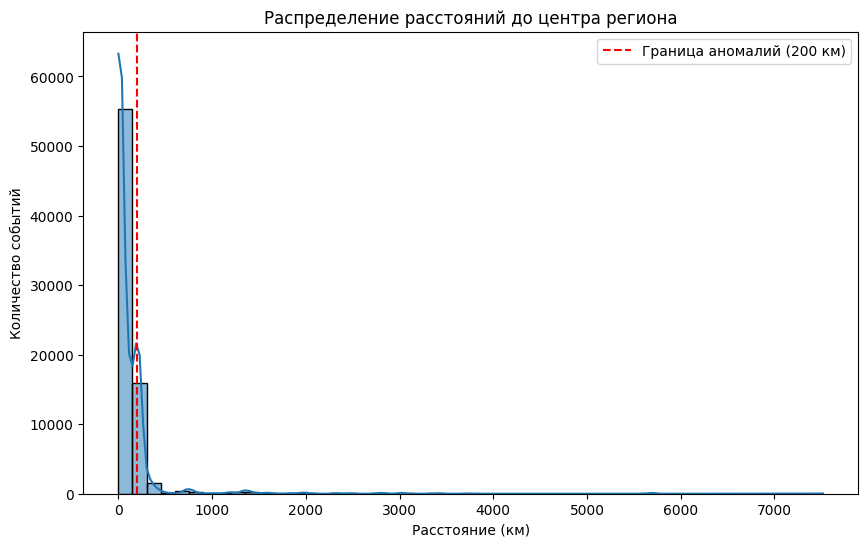

In [28]:
 
print(df_1['distance_km'].describe())
 
plt.figure(figsize=(10, 6))
sns.histplot(df_1['distance_km'], bins=50, kde=True)
plt.axvline(x=200, color='r', linestyle='--', label='Граница аномалий (200 км)')
plt.title('Распределение расстояний до центра региона')
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество событий')
plt.legend()
plt.show()

Удалено записей: 14814
Осталось записей: 60246


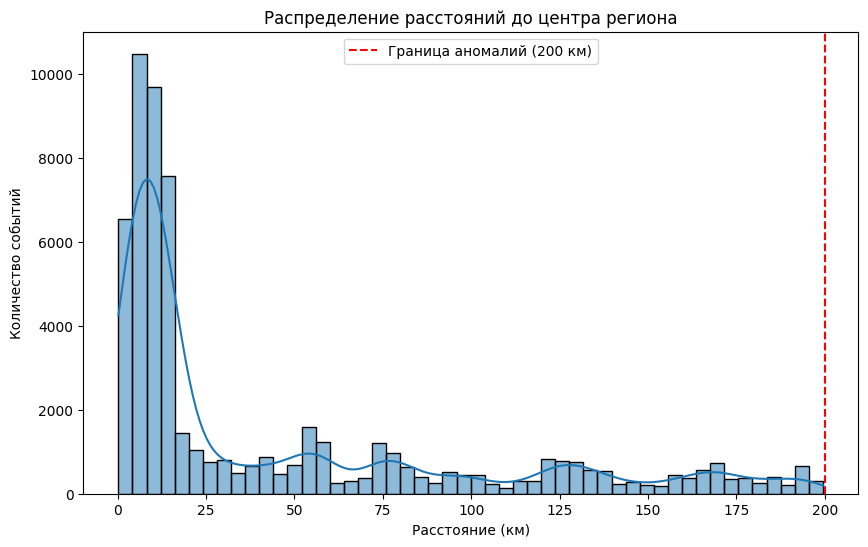

In [29]:
df_clean = df_1[df_1['distance_km'] <= 200].copy()

 
print(f"Удалено записей: {len(df_1) - len(df_clean)}")
print(f"Осталось записей: {len(df_clean)}")
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['distance_km'], bins=50, kde=True)
plt.axvline(x=200, color='r', linestyle='--', label='Граница аномалий (200 км)')
plt.title('Распределение расстояний до центра региона')
plt.xlabel('Расстояние (км)')
plt.ylabel('Количество событий')
plt.legend()
plt.show()

In [30]:
region_counts = df_clean['hwregion'].value_counts().reset_index()
region_counts.columns = ['Регион', 'Количество записей']

 
print(region_counts.to_string(index=False))

           Регион  Количество записей
     ЮГ\Краснодар               19735
ЮГ\Ростов-на-Дону               14795
   У\Екатеринбург               14609
    С\Новосибирск               10873
         П\Казань                 234


После чистки данных выявляется сильный дисбаланс, так как мы уже не может взять другой город, тк адреса парсились строго для этих городов, попробую взять значений по минимуму

In [31]:
min_count = df_clean['hwregion'].value_counts().min()
balanced_df = pd.DataFrame()

for region in df_clean['hwregion'].unique():
    region_data = df_clean[df_clean['hwregion'] == region]
    balanced_sample = region_data.sample(n=min_count, random_state=42)
    balanced_df = pd.concat([balanced_df, balanced_sample])
region_counts = balanced_df['hwregion'].value_counts().reset_index()
print(region_counts.to_string(index=False))

         hwregion  count
   У\Екатеринбург    234
     ЮГ\Краснодар    234
ЮГ\Ростов-на-Дону    234
         П\Казань    234
    С\Новосибирск    234


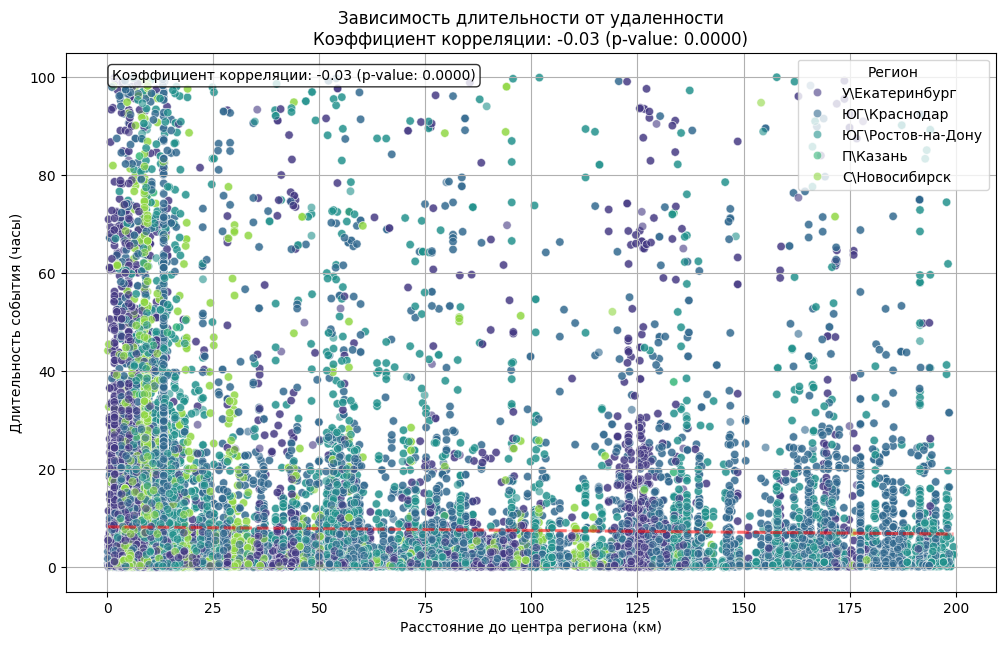

In [ ]:
from scipy.stats import pearsonr

plt.figure(figsize=(12, 7))

 
scatter = sns.scatterplot(
    data=df_clean,
    x='distance_km',
    y='duration',
    hue='hwregion',
    alpha=0.6,
    palette='viridis'
)

sns.regplot(
    data=df_clean,
    x='distance_km',
    y='duration',
    scatter=False,
    color='red',
    line_kws={'linestyle': '--', 'alpha': 0.5}
)

corr, p_value = pearsonr(df_clean['distance_km'], df_clean['duration'])
corr_text = f"Коэффициент корреляции: {corr:.2f} (p-value: {p_value:.4f})"

plt.title(f'Зависимость длительности от удаленности\n{corr_text}')
plt.xlabel('Расстояние до центра региона (км)')
plt.ylabel('Длительность события (часы)')
plt.grid(True)
plt.legend(title='Регион')


plt.annotate(
    corr_text,
    xy=(0.05, 0.95),
    xycoords='axes fraction',
    bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')
)

plt.show()

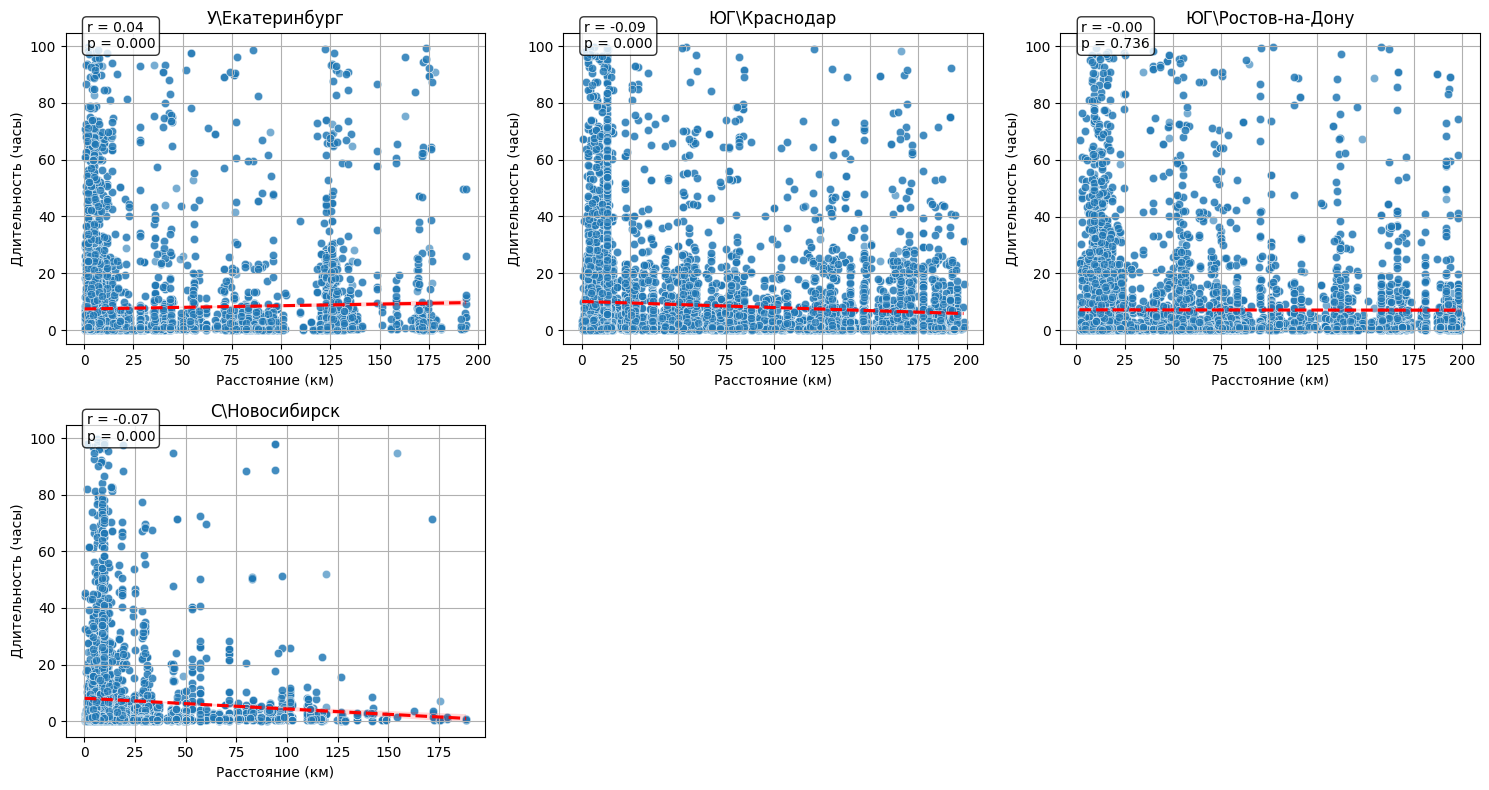

In [ ]:

df_clean = df_clean[df_clean['hwregion'] != 'П\Казань']
regions = df_clean['hwregion'].unique()
n_regions = len(regions)


fig, axes = plt.subplots(
    nrows=(n_regions + 2) // 3,  # Округляем вверх
    ncols=3,
    figsize=(15, 4*((n_regions + 2) // 3))
)

# Убираем лишние оси если регионов не кратко 3
for ax in axes.flatten()[n_regions:]:
    ax.axis('off')


for i, region in enumerate(regions):
    ax = axes.flatten()[i]
    region_data = df_clean[df_clean['hwregion'] == region]
  
    if len(region_data) >= 2: 
  
        sns.scatterplot(
            data=region_data,
            x='distance_km',
            y='duration',
            alpha=0.6,
            ax=ax
        )

        sns.regplot(
            data=region_data,
            x='distance_km',
            y='duration',
            scatter=False,
            color='red',
            line_kws={'linestyle': '--'},
            ax=ax
        )
        
    
        corr, p_value = pearsonr(region_data['distance_km'], region_data['duration'])
        corr_text = f"r = {corr:.2f}\np = {p_value:.3f}"
        
    
        ax.annotate(
            corr_text,
            xy=(0.05, 0.95),
            xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        ax.set_title(region)
        ax.set_xlabel('Расстояние (км)')
        ax.set_ylabel('Длительность (часы)')
        ax.grid(True)
    else:
        ax.axis('off') 

plt.tight_layout()
plt.show()

в целом корреляция практически отсутствует, что говорит о том, что длительность события не завивист от расстояния до центра региона.

можно подметить что в г.Кранодаре чуть более выражено наклонена линия тренда, что говорит о том, что в этом городе наблюдается отрицательная зависимость.

можно взять 4 региона без казани, чтоб увеличить количество наблюдений, может это поменяет картину.

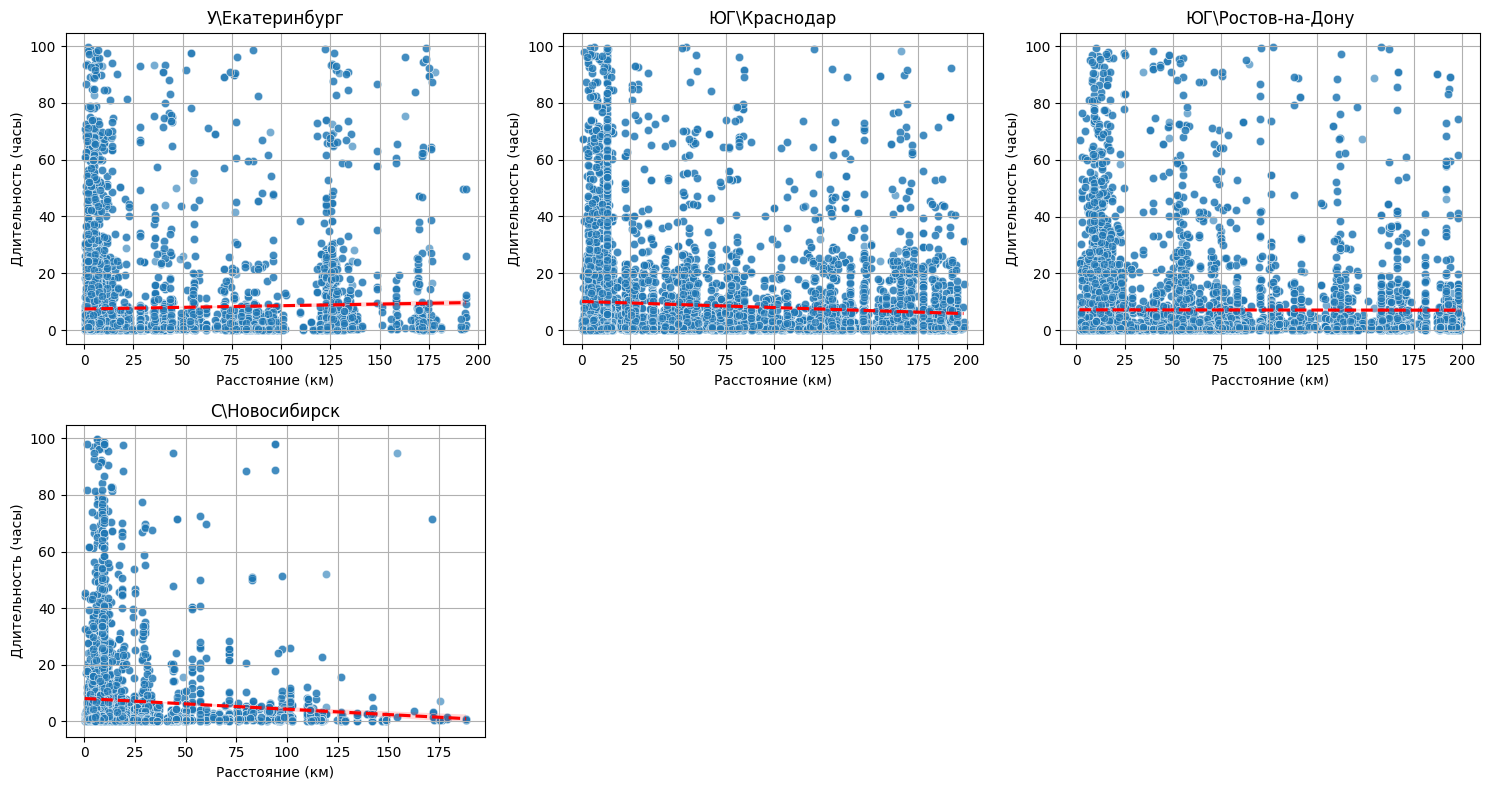

In [34]:
df_clean = df_clean[df_clean['hwregion'] != 'П\Казань']


regions = df_clean['hwregion'].unique()
n_regions = len(regions)

fig, axes = plt.subplots(
    nrows=(n_regions + 2) // 3,  
    ncols=3,
    figsize=(15, 4*((n_regions + 2) // 3))
)
 
for ax in axes.flatten()[n_regions:]:
    ax.axis('off')

 
for i, region in enumerate(regions):
    ax = axes.flatten()[i]
    region_data =df_clean[df_clean['hwregion'] == region]
    
    sns.scatterplot(
        data=region_data,
        x='distance_km',
        y='duration',
        alpha=0.6,
        ax=ax
    )
     
    sns.regplot(
        data=region_data,
        x='distance_km',
        y='duration',
        scatter=False,
        color='red',
        line_kws={'linestyle': '--'},
        ax=ax
    )
    
    ax.set_title(region)
    ax.set_xlabel('Расстояние (км)')
    ax.set_ylabel('Длительность (часы)')
    ax.grid(True)

plt.tight_layout()
plt.show()

Корреляция по прежнему остутствует

# 2

In [35]:
count_p=df.groupby('priority').size()
count_p

priority
0       197
1      1381
2      4070
3    219380
4     80195
5    189775
dtype: int64

заметен очень силный дисбаланс


In [36]:
priority_counts = df.groupby('priority').size()
print(priority_counts)

min_count = priority_counts.min()


balanced_data = []

# Случайная выборка из каждого класса
for priority in priority_counts.index:
 
    sampled_data = df[df['priority'] == priority].sample(n=min_count, random_state=1)   
    balanced_data.append(sampled_data)
 
balanced_df = pd.concat(balanced_data, ignore_index=True)
 
print(balanced_df['priority'].value_counts())

priority
0       197
1      1381
2      4070
3    219380
4     80195
5    189775
dtype: int64
priority
0    197
1    197
2    197
3    197
4    197
5    197
Name: count, dtype: int64


берем 201 наблюдение из каждого класса

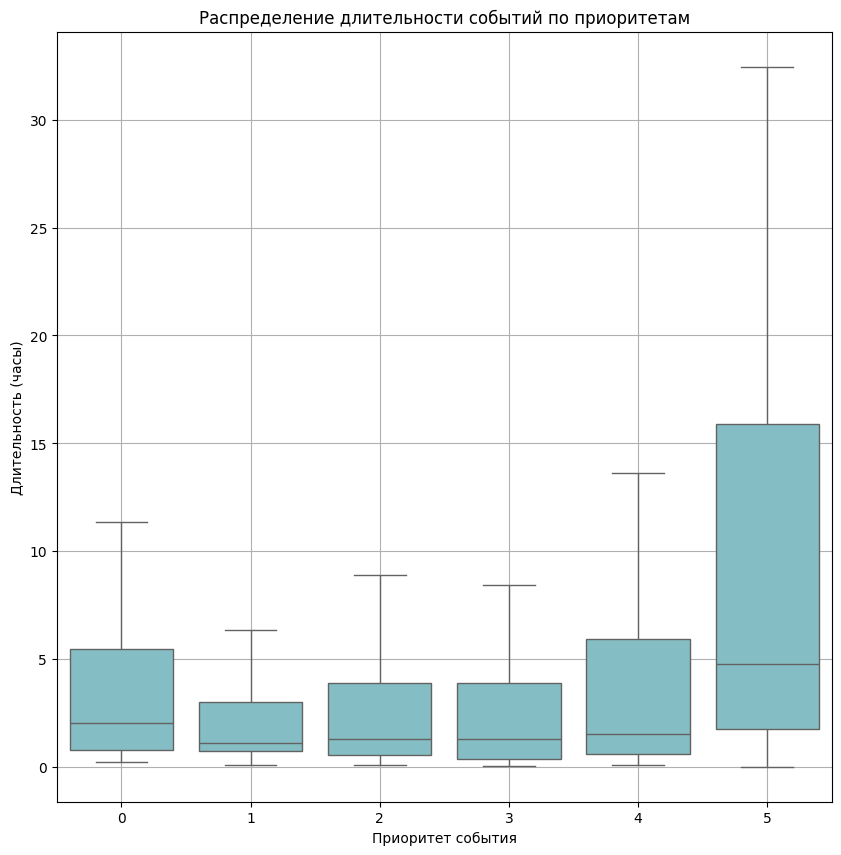

In [37]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='priority', y='duration', data=balanced_df, showfliers=False, color='#7AC5CD')  # Исключаем выбросы 
plt.title('Распределение длительности событий по приоритетам')
plt.xlabel('Приоритет события')
plt.ylabel('Длительность (часы)')
plt.grid(True)
plt.show()

In [38]:
# критерий Краскела-Уоллиса (непараметрический аналог ANOVA):
from scipy.stats import kruskal

groups = [balanced_df[balanced_df['priority'] == p]['duration'] for p in balanced_df['priority'].unique()]


stat, p_value = kruskal(*groups)
print(f"p-value: {p_value:.3f}")

if p_value < 0.05:
    print("Есть статистически значимые различия между группами (приоритет влияет на длительность).")
else:
    print("Нет значимых различий (приоритет не влияет на длительность).")

p-value: 0.000
Есть статистически значимые различия между группами (приоритет влияет на длительность).


# 3

In [77]:
weather_events = df[df['classificatorcause'].str.startswith('/Погодные условия/', na=False)]

In [78]:
weather_events

,request_id,priority,status,hwregion,neaddress,classificatorcause,shortdescription,nename,ne_priority,eventtime_dt_utc,fixtime_dt_utc,nesite,site_priority,duration
12531,MSK000028203692,3,9,Ц\Тверь,"Россия, обл. Тверская, р-н Калязинский, с/п Се...",/Погодные условия/Гроза,Отключение 1 BTS 1 eNodeB\nLTE ARS,BTS_69_00535_LN_MTSVC,4.0,2024-04-26 15:57:24,2024-04-26 18:54:40,PL_69_00535,5.0,2.954444
27365,MSK000028044812,4,9,ДВ\Хабаровск,"Россия, край Хабаровский, р-н Амурский, с Боло...",/Погодные условия/Очень сильный ветер (в том ч...,CSSR_LTE(R+S1+E)<85% 3R(15')H#2#,BTS_27_941_GLN,3.0,2024-04-10 09:09:00,2024-04-12 09:09:00,PL_27_941,4.0,48.000000
39184,MSK000028133728,3,9,М\Москва,"Россия, обл. Московская, г. Коломна, ул. Шоссе...",/Погодные условия/Очень сильный ветер (в том ч...,Отключение 2 eNodeB #многократно,BTS_77_13041_L21_2,4.0,2024-04-19 10:47:43,2024-04-19 20:45:10,PL_77_13041,4.0,9.957500
39485,MSK000028146338,5,8,П\Оренбург,"Россия, обл. Оренбургская, р-н Александровский...",/Погодные условия/Подтопление,Availability_UMTS < 90% during 3 hour\nRAN_Ava...,BTS_56_518_ULN,4.0,2024-04-20 22:58:31,2024-04-22 06:13:52,PL_56_518,3.0,31.255833
39505,MSK000028140657,5,8,П\Оренбург,"Россия, обл. Оренбургская, г. Оренбург, ул. Бр...",/Погодные условия/Подтопление,Availability_UMTS < 90% during 3 hour\nRAN_Ava...,BTS_56_134_ULN,4.0,2024-04-20 03:20:19,2024-04-22 06:13:47,PL_56_134,5.0,50.891111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684858,MSK000028231057,5,9,У\ХМАО,"Россия, а/о Ханты-Мансийский Автономный округ ...",/Погодные условия/Очень сильный ветер (в том ч...,"Автоотключение соты 20 раз в течение суток, не...",BTS_86_458_LN,4.0,2024-04-29 18:26:00,2024-05-02 03:53:57,PL_86_458,5.0,57.465833
684864,MSK000028230995,5,9,У\ХМАО,"Россия, а/о Ханты-Мансийский Автономный округ ...",/Погодные условия/Очень сильный ветер (в том ч...,"Автоотключение соты 20 раз в течение суток, не...",BTS_86_459_LN,4.0,2024-04-29 18:25:00,2024-05-02 03:55:17,PL_86_459,5.0,57.504722
686004,MSK000028209995,3,9,Ц\Калуга,"Россия, обл. Калужская, г. Калуга, ш. Грабцевс...",/Погодные условия/Сильный дождь,Не работает сектор 2G. CELL_40_113_1_D. + Не р...,BTS_40_113_GD,4.0,2024-04-27 08:05:08,2024-04-28 07:15:43,PL_40_113,5.0,23.176389
689254,MSK000028221149,3,9,С\Кемерово,"Россия, обл. Кемеровская область - Кузбасс, р-...",/Погодные условия/Очень сильный ветер (в том ч...,Отключение всех секторов на данной Radio Node ...,BTS_42_0191_GLN,4.0,2024-04-28 17:55:32,2024-04-28 18:33:06,PL_42_0191,5.0,0.626111


In [85]:
top_regions = weather_events['hwregion'].value_counts().head(5)
top_regions=pd.DataFrame(top_regions)
weather_events = weather_events[weather_events['hwregion'].isin(top_regions.index)]

In [79]:
mean_duration_df = weather_events.groupby('hwregion')['duration'].mean().reset_index()
mean_duration_df.columns = ['region', 'mean_duration']

mean_duration_df = mean_duration_df[mean_duration_df['region'].isin(top_regions.index)]
mean_duration_df

,region,mean_duration
0,ДВ\Благовещенск,12.447517
5,М\Москва,10.961422
7,П\Казань,15.277901
9,П\Оренбург,27.190570
25,У\Курган,10.863138


In [80]:
weather_events['weather_subtype'] = weather_events['classificatorcause'].str.split('/').str[2]


C:\Users\user\AppData\Local\Temp\ipykernel_324\4207368257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_events['weather_subtype'] = weather_events['classificatorcause'].str.split('/').str[2]


отделяем подтип события с погодными условиями в отдельнвй стобец 

In [86]:
import pandas as pd

# Извлекаем подтип погодных условий (с обработкой ошибок)
weather_events['weather_subtype'] = weather_events['classificatorcause'].str.split('/').str[2].fillna('Не указан')

# Группируем данные по регионам и подтипам погоды
weather_stats = weather_events.groupby(['hwregion', 'weather_subtype']).agg(
    Средняя_длительность=('duration', 'mean'),
    Количество_событий=('duration', 'count'),
    Максимальная_длительность=('duration', 'max')
).reset_index()

# Находим самый долгий инцидент для каждого региона (с проверкой)
if not weather_events.empty:
    longest_incidents = weather_events.loc[weather_events.groupby('hwregion')['duration'].idxmax()].copy()
    longest_incidents['Самый_долгий_инцидент'] = (
        longest_incidents['weather_subtype'] + " (" + 
        longest_incidents['duration'].round(2).astype(str) + " ч)"
    )
else:
    longest_incidents = pd.DataFrame(columns=['hwregion', 'Самый_долгий_инцидент'])
# самый короткий
if not weather_events.empty:
    short_incidents = weather_events.loc[weather_events.groupby('hwregion')['duration'].idxmin()].copy()
    short_incidents['Самый_короткий_инцидент'] = (
        short_incidents['weather_subtype'] + " (" + 
        short_incidents['duration'].round(2).astype(str) + " ч)"
    )
else:
    short_incidents = pd.DataFrame(columns=['hwregion', 'Самый_короткий_инцидент'])
# Создаем итоговую таблицу с безопасным слиянием
result_table = weather_stats.groupby('hwregion').agg(
    Средняя_длительность=('Средняя_длительность', 'mean')
).reset_index()

# Безопасное добавление информации о самых долгих инцидентах
result_table = result_table.merge(
    longest_incidents[['hwregion', 'Самый_долгий_инцидент']],
    on='hwregion',
    how='left'
).fillna({'Самый_долгий_инцидент': 'Данные отсутствуют'})
result_table = result_table.merge(
    short_incidents[['hwregion', 'Самый_короткий_инцидент']],
    on='hwregion',
    how='left'
).fillna({'Самый_долгий_инцидент': 'Данные отсутствуют'})


# Переименовываем и форматируем
result_table.columns = ['Регион', 'Средняя длительность', 'Самый долгий инцидент','Самый короткий инцидент']
result_table['Средняя длительность'] = result_table['Средняя длительность'].round(2).astype(str) + ' ч'
result_table

C:\Users\user\AppData\Local\Temp\ipykernel_324\2159625331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_events['weather_subtype'] = weather_events['classificatorcause'].str.split('/').str[2].fillna('Не указан')


,Регион,Средняя длительность,Самый долгий инцидент,Самый короткий инцидент
0,ДВ\Благовещенск,25.67 ч,Метель (64.75 ч),Аномально холодная погода (0.2 ч)
1,М\Москва,23.26 ч,Половодье (58.43 ч),Сильный дождь (0.03 ч)
2,П\Казань,19.88 ч,Гроза (39.75 ч),Очень сильный ветер (в том числе шквал) (2.05 ч)
3,П\Оренбург,17.8 ч,Подтопление (99.7 ч),Таяние снегов (0.74 ч)
4,У\Курган,10.87 ч,Подтопление (25.88 ч),Налипание (отложение) мокрого снега на провода...


In [89]:
weather_impact = weather_events.groupby('weather_subtype')['duration'].agg(['mean', 'count'])
weather_impact[weather_impact['count'] > 5].sort_values('mean', ascending=False).to_csv('w_i_t.csv')
weather_impact

,mean,count
weather_subtype,,
Аномально жаркая погода,10.989678,133
Аномально холодная погода,0.655556,7
Гроза,34.472870,6
Метель,64.754722,3
"Налипание (отложение) мокрого снега на проводах и деревьях, АФУ.",1.624028,4
Очень сильный ветер (в том числе шквал),8.910029,38
Подтопление,27.954252,441
Половодье,30.291587,7
Сильный дождь,8.544823,33


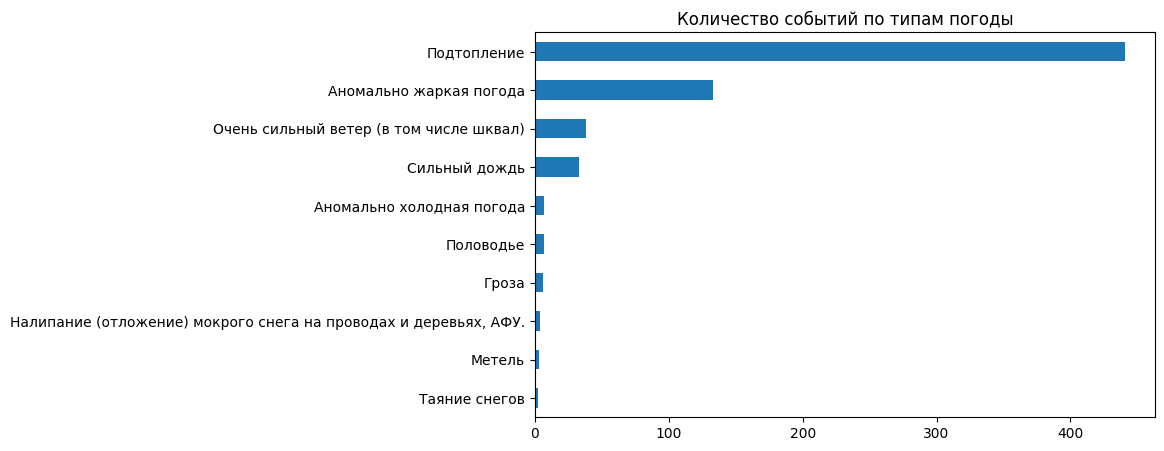

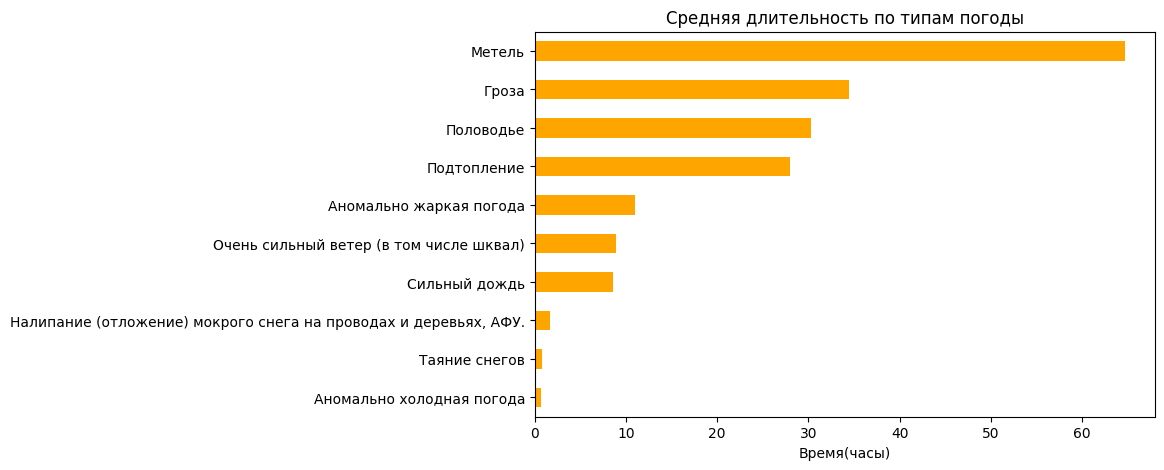

In [90]:
plt.figure(figsize=(8, 5))
weather_impact['count'].sort_values().plot(kind='barh')
plt.ylabel('')
plt.title('Количество событий по типам погоды')
plt.show()

plt.figure(figsize=(8, 5))
weather_impact['mean'].sort_values().plot(kind='barh', color='orange')
plt.ylabel('')
plt.xlabel('Время(часы)')
plt.title('Средняя длительность по типам погоды')
plt.show()